In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/3"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/3"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/3"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/3"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/3"
pattern = "/**/*test_night*.txt"

train_A_over_iteration = None # None = best
train_B_over_iteration = None # None = best
train_C_over_iteration = None # None = best
train_A_over_ganaug_025_iteration = None # None = best
train_A_over_ganaug_050_iteration = None # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Best iterations ##

### --> All metrics are evaluated independently on their best iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
-1,0.309255,0.612315,0.283747,0.093226,0.331023,0.655235,0.07468,0.332716,0.388529,0.210723,0.414777,0.715311


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,105000,105000,105000,105000,105000,105000,45000,105000,105000,105000,105000,105000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.321389,0.631105,0.292138,0.104175,0.349699,0.661777,0.075556,0.33975,0.406015,0.223881,0.442933,0.720339


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
67500,0.359714,0.694059,0.333348,0.126887,0.393705,0.699798,0.079676,0.3685,0.43391,0.244903,0.476788,0.751073


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,162500,67500,162500,112500,67500,162500,67500,162500,110000,162500,97500,110000


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.360454,0.694059,0.335216,0.127014,0.393705,0.710674,0.079676,0.371141,0.437679,0.247842,0.485419,0.761299


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
47500,0.365234,0.695895,0.339536,0.129424,0.40298,0.707016,0.079774,0.372116,0.44044,0.244374,0.492011,0.754972


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,85000,85000,85000,85000,47500,62500,62500,85000,85000,85000,47500,62500


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.365608,0.697497,0.339781,0.132451,0.40298,0.715039,0.080497,0.373606,0.441909,0.25327,0.492011,0.762203


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.320658,0.628818,0.297134,0.09968,0.361738,0.648563,0.074789,0.336321,0.401895,0.209108,0.451508,0.713616


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,77500,42500,167500,77500,42500,107500,77500,167500,42500,42500,42500,107500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.321309,0.628818,0.297989,0.100468,0.361738,0.664788,0.075852,0.33677,0.401895,0.209108,0.451508,0.721638


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
85000,0.314773,0.625241,0.289258,0.102558,0.348701,0.640343,0.074515,0.334754,0.395913,0.213768,0.437486,0.700904


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,85000,85000,102500,85000,85000,175000,175000,175000,85000,85000,85000,175000


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.314773,0.625241,0.290186,0.102558,0.348701,0.656764,0.075315,0.3362,0.395913,0.213768,0.437486,0.717853


## Improvements ##

### train_A_over --> train_B_over ###

In [20]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.039065,0.062954,0.043078,0.02284,0.044006,0.048896,0.00412,0.03139,0.031664,0.023961,0.042486,0.04096,A to B


### train_A_over --> train_C_over ###

In [21]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.044219,0.066392,0.047643,0.028276,0.053281,0.053261,0.004941,0.033856,0.035894,0.029388,0.049078,0.041864,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [22]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.00008,-0.002287,0.005851,-0.003707,0.012039,0.003011,0.000296,-0.00298,-0.00412,-0.014774,0.008575,0.001299,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [23]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.006616,-0.005864,-0.001953,-0.001616,-0.000998,-0.005013,-0.000241,-0.00355,-0.010102,-0.010114,-0.005447,-0.002486,A to A50


## Combine ##

In [24]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050], axis = 0)

In [25]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.039065,0.062954,0.043078,0.02284,0.044006,0.048896,0.00412,0.03139,0.031664,0.023961,0.042486,0.04096


Text(0, 0.5, 'Absolute change in score')

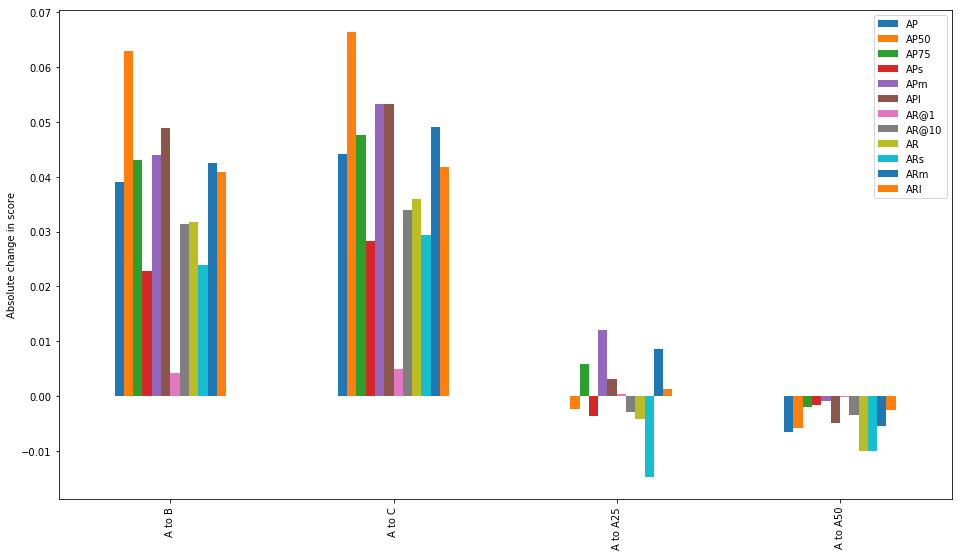

In [26]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [27]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [28]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

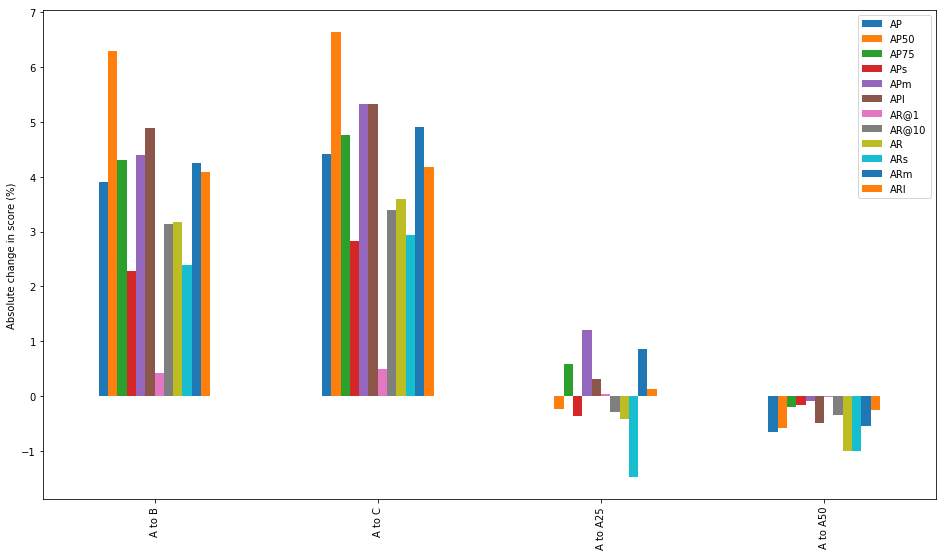

In [29]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [30]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)